In [5]:
import os
import numpy as np
import pandas as pd
from functions import eda_missing_nunique

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [6]:
ogdf = pd.read_csv("zomato.csv")

In [7]:
ogdf.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df=pd.read_csv("zomato.csv")

In [9]:
df.shape

(51717, 17)

In [10]:
eda_missing_nunique(df)

,Data type,Total number of values,Total Missing Values,Percentage missing,Count of unique values
url,object,51717,0,0.000000,51717
address,object,51717,0,0.000000,11495
name,object,51717,0,0.000000,8792
online_order,object,51717,0,0.000000,2
book_table,object,51717,0,0.000000,2
rate,object,51717,7775,15.033741,64
votes,int64,51717,0,0.000000,2328
phone,object,51717,1208,2.335789,14926
location,object,51717,21,0.040606,93
rest_type,object,51717,227,0.438927,93


In [11]:
df = df.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(type)':'type','listed_in(city)':'city'})

In [12]:
#Cleaning Approx_Cost Column
df['approx_cost']=df['approx_cost'].astype(str)
df['approx_cost'] = df['approx_cost'].str.replace(',','')
df['approx_cost'] = df['approx_cost'].fillna(value=0)

In [13]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
approx_cost         0
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [14]:
df['rate'] = df['rate'].str.replace('/5','')

In [15]:
df.loc[df['rate'] == "-"]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city
3068,https://www.zomato.com/bangalore/house-of-tast...,"#235/1 12th Cross, Wilson Garden, Bangalore",House of Tasty Food,No,No,-,0,+91 9538004054,Wilson Garden,Quick Bites,NaN,North Indian,400,[],[],Delivery,Basavanagudi
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",nan,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3373,https://www.zomato.com/bangalore/right-pizza-b...,"Shop 9, East Anjanaiya Temple Street, Gandhi B...",Right Pizza,Yes,No,-,0,+91 9980473473\n+91 9845338098,Basavanagudi,Quick Bites,NaN,Pizza,300,[],[],Dine-out,Basavanagudi
3378,https://www.zomato.com/bangalore/mezban-family...,"Lalbagh Fort Road, basavanagudi, Banglore.",Mezban Family Restaurant,Yes,No,-,0,+91 9344609944\n+91 8072284844,Basavanagudi,Quick Bites,NaN,"Chinese, North Indian",300,"[('Rated 5.0', 'RATED\n Food was delicious es...",[],Dine-out,Basavanagudi
3387,https://www.zomato.com/bangalore/mota-bawarchi...,"19/A H. Siddhaiah Road, Sudhama Nagar, Opposit...",Mota Bawarchi,No,No,-,0,+91 9380109284,Basavanagudi,Quick Bites,NaN,"North Indian, Biryani, Fast Food",300,[],[],Dine-out,Basavanagudi
3396,https://www.zomato.com/bangalore/aahar-cafe-ba...,"39/4, North Anjaneya Temple Street, Basavanagu...",Aahar Cafe,No,No,-,0,+91 9448353673,Basavanagudi,Quick Bites,NaN,South Indian,100,"[('Rated 1.0', 'RATED\n Ververy bad.....not g...",[],Dine-out,Basavanagudi
3397,https://www.zomato.com/bangalore/arya-vysya-re...,"12/1, Food Street, Old Market Road, V.V.Puram,...",Arya Vysya Refreshment,No,No,-,0,080 26614521\n+91 9901903396,Basavanagudi,Quick Bites,NaN,South Indian,100,[],[],Dine-out,Basavanagudi
3398,https://www.zomato.com/bangalore/victoria-term...,"15, South End Road, Basavanagudi, Bangalore",Victoria Terminus,No,No,-,0,080 65555612,Basavanagudi,Quick Bites,NaN,"Fast Food, Maharashtrian",250,[],[],Dine-out,Basavanagudi
3408,https://www.zomato.com/bangalore/idly-mane-bas...,"11/1 & 11/5 Food Street, Old Market Road, V.V....",Idly Mane,No,No,-,0,+91 9916994813\n+91 9513063623,Basavanagudi,Quick Bites,NaN,"South Indian, Street Food",200,[],[],Dine-out,Basavanagudi
3409,https://www.zomato.com/bangalore/oasis-food-ce...,"1395, 2nd Cross, Kathriguppe Main Road, Behind...",Oasis Food Center,No,No,-,0,+91 8105575495,Basavanagudi,Quick Bites,NaN,Fast Food,150,"[('Rated 4.0', 'RATED\n One stop shop for che...",[],Dine-out,Basavanagudi


In [16]:
df['rate'] = df['rate'].str.replace('-','0')

In [17]:
df.loc[df['rate'] == "NEW"]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500,[],[],Delivery,Banashankari
110,https://www.zomato.com/bangalore/hari-super-sa...,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,NEW,0,+91 9886722163,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,"[('Rated 1.0', 'RATED\n I have been here many...",[],Delivery,Banashankari
130,https://www.zomato.com/bangalore/roll-magic-fa...,"28, 4th Cross Road, Dwaraka Nagar, Banashankar...",Roll Magic Fast Food,No,No,NEW,0,+91 9731409204,Banashankari,"Takeaway, Delivery",NaN,"Biryani, Rolls, Chinese",200,[],[],Delivery,Banashankari
131,https://www.zomato.com/bangalore/foodlieious-m...,"3/16, 22 Main Road, Magenta Block, PES College...",Foodlieious Multi Cuisine,No,No,NEW,0,+91 9168753522\r\n+91 8217877100,Banashankari,Quick Bites,NaN,North Indian,100,[],[],Delivery,Banashankari
132,https://www.zomato.com/bangalore/thanishka-nat...,"17/1, Ramaiah Garden, Kadirenahalli Circle, Dr...",Thanishka Nati And Karavali Style,No,No,NEW,0,+91 9108823881\r\n+91 8722229336,Banashankari,Quick Bites,NaN,"Biryani, Fast Food",400,[],[],Delivery,Banashankari
143,https://www.zomato.com/bangalore/melting-melod...,"Bhuvaneshwari Nagar BSK 3RD Stage, Banashankar...",Melting Melodies,No,No,NEW,0,+91 8970474798\r\n+91 8747977555,Banashankari,"Takeaway, Delivery",NaN,"Pizza, Fast Food",100,[],[],Delivery,Banashankari
144,https://www.zomato.com/bangalore/new-indrapras...,"77, 50 Ft Road, Hanumathnagara, Banashankari, ...",New Indraprasta,No,No,NEW,0,+91 8867333003,Banashankari,Quick Bites,NaN,"South Indian, Beverages",150,[],[],Delivery,Banashankari
154,https://www.zomato.com/bangalore/bitez-banasha...,"12, Banashankari, Bangalore",Bitez,No,No,NEW,0,+91 9916781796,Banashankari,Quick Bites,NaN,Fast Food,100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",[],Delivery,Banashankari
276,https://www.zomato.com/bangalore/ssv-upahar-ja...,"14/1, 8th Fmain, 3rd Block, Jayanagar, Bangalore",SSV Upahar,Yes,No,NEW,0,+91 7022622678,Jayanagar,Quick Bites,NaN,"South Indian, Chinese",300,[],"['Idli', 'Vada', 'Thatte Idli', 'Thatte Vada',...",Delivery,Banashankari


In [18]:
df['rate'] = df['rate'].str.replace('NEW','0')

In [19]:
df['rate'] = df['rate'].fillna(value=0)

In [20]:
df['rate'] = df['rate'].astype(float)

In [21]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
approx_cost         0
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [22]:
#Removing unnecessary columns
df=df.drop(['phone','url','dish_liked','menu_item','address','reviews_list','type','book_table','online_order'],axis=1)

In [23]:
df.isnull().sum()

name             0
rate             0
votes            0
location        21
rest_type      227
cuisines        45
approx_cost      0
city             0
dtype: int64

In [24]:
#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [25]:
df.isnull().sum()

name             0
rate             0
votes            0
location        17
rest_type      150
cuisines        40
approx_cost      0
city             0
dtype: int64

In [26]:
df.shape

(35455, 8)

In [27]:
df.isnull().sum()

name             0
rate             0
votes            0
location        17
rest_type      150
cuisines        40
approx_cost      0
city             0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

name           0
rate           0
votes          0
location       0
rest_type      0
cuisines       0
approx_cost    0
city           0
dtype: int64

In [30]:
df.shape

(35282, 8)

In [31]:
#Different types of Cuisines in the City
print("all different cuisines:")
cuisines = set()
for i in df['cuisines']:
    for j in str(i).split(', '):
        cuisines.add(j)
cuisines

all different cuisines:


{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Australian',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'Drinks Only',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mongolian',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Paan',
 'Pan Asian',
 'Pa

In [32]:
df['NorthIndian'] = np.where(df['cuisines'].str.contains("North Indian|Indian", case=False, na=False), '1', '0')
df['NorthEastIndian'] = np.where(df['cuisines'].str.contains("North Eastern|Nepalese|Assamese|Naga", case=False, na=False), '1', '0')
df['Chinese'] = np.where(df['cuisines'].str.contains("Chinese|Momos", case=False, na=False), '1', '0')
df['SouthIndian'] = np.where(df['cuisines'].str.contains("South Indian|Kerala|Andhra|Tamil|Sri Lankan", case=False, na=False), '1', '0')
df['Italian'] = np.where(df['cuisines'].str.contains("Italian|Pizza", case=False, na=False), '1', '0')
df['Mexican'] = np.where(df['cuisines'].str.contains("Mexican|South American", case=False, na=False), '1', '0')
df['American'] = np.where(df['cuisines'].str.contains("American|Burger|Hot dogs", case=False, na=False), '1', '0')
df['Mughlai'] = np.where(df['cuisines'].str.contains("Mughlai|Kebab", case=False, na=False), '1', '0')
df['Afghani'] = np.where(df['cuisines'].str.contains("Afghani|Afghan|Arabian", case=False, na=False), '1', '0')
df['Mediterranean'] = np.where(df['cuisines'].str.contains("Mediterranean|Middle Eastern|African|Mongolian|Lebanese", case=False, na=False), '1', '0')
df['Seafood'] = np.where(df['cuisines'].str.contains("Seafood", case=False, na=False), '1', '0')
df['European'] = np.where(df['cuisines'].str.contains("German|Jewish|Turkish|Spanish|Portuguese|Greek|French|European|Belgian|British|Continental", case=False, na=False), '1', '0')
df['Asian'] = np.where(df['cuisines'].str.contains("Vietnamese|Indonesian|Thai|Pan Asian|Korean|Malaysian|Singaporean", case=False, na=False), '1', '0')
df['Japanese'] = np.where(df['cuisines'].str.contains("Sushi|Japanese", case=False, na=False), '1', '0')
df['Maharashtrian'] = np.where(df['cuisines'].str.contains("Maharashtrian|Konkan|Goan", case=False, na=False), '1', '0')
df['Gujarati'] = np.where(df['cuisines'].str.contains("Rajasthani|Gujarati", case=False, na=False), '1', '0')
df['Cafe'] = np.where(df['cuisines'].str.contains("Cafe|Bubble Tea|Coffee", case=False, na=False), '1', '0')
df['Desserts'] = np.where(df['cuisines'].str.contains("Desserts|Mithai", case=False, na=False), '1', '0')
df['HealthyFood'] = np.where(df['cuisines'].str.contains("Healthy Food|Salad|Sandwich", case=False, na=False), '1', '0')
df['StreetFood'] = np.where(df['cuisines'].str.contains("Street Food|Rolls|Fast Food|Finger Food", case=False, na=False), '1', '0')


In [33]:
df.shape

(35282, 28)

In [34]:
#drop unnecessary column 
df=df.drop(['cuisines'],axis=1)

In [35]:
#Different types of rest_type in the City
print("all different restaruant types :")
resttype = set()
for i in df['rest_type']:
    for j in str(i).split(', '):
        resttype.add(j)
resttype

all different restaruant types :


{'Bakery',
 'Bar',
 'Beverage Shop',
 'Bhojanalya',
 'Cafe',
 'Casual Dining',
 'Club',
 'Confectionery',
 'Delivery',
 'Dessert Parlor',
 'Dhaba',
 'Fine Dining',
 'Food Court',
 'Food Truck',
 'Irani Cafee',
 'Kiosk',
 'Lounge',
 'Meat Shop',
 'Mess',
 'Microbrewery',
 'Pop Up',
 'Pub',
 'Quick Bites',
 'Sweet Shop',
 'Takeaway'}

In [36]:
df['rest_type_Bakery'] = np.where(df['rest_type'].str.contains("Bakery", case=False, na=False), '1', '0')
df['rest_type_Bar'] = np.where(df['rest_type'].str.contains("Bar", case=False, na=False), '1', '0')
df['rest_type_Beverage Shop'] = np.where(df['rest_type'].str.contains("Beverage Shop", case=False, na=False), '1', '0')
df['rest_type_Bhojanalya'] = np.where(df['rest_type'].str.contains("Bhojanalya", case=False, na=False), '1', '0')
df['rest_type_Cafe'] = np.where(df['rest_type'].str.contains("Cafe", case=False, na=False), '1', '0')
df['rest_type_Casual Dining'] = np.where(df['rest_type'].str.contains("Casual Dining", case=False, na=False), '1', '0')
df['rest_type_Club'] = np.where(df['rest_type'].str.contains("Club", case=False, na=False), '1', '0')
df['rest_type_Confectionery'] = np.where(df['rest_type'].str.contains("Confectionery", case=False, na=False), '1', '0')
df['rest_type_Delivery'] = np.where(df['rest_type'].str.contains("Delivery", case=False, na=False), '1', '0')
df['rest_type_Dessert Parlor'] = np.where(df['rest_type'].str.contains("Dessert Parlor", case=False, na=False), '1', '0')
df['rest_type_Dhaba'] = np.where(df['rest_type'].str.contains("DhabaFine Dining", case=False, na=False), '1', '0')
df['rest_type_Fine Dining'] = np.where(df['rest_type'].str.contains("Fine Dining", case=False, na=False), '1', '0')
df['rest_type_Food Court'] = np.where(df['rest_type'].str.contains("Food Court", case=False, na=False), '1', '0')
df['rest_type_Food Truck'] = np.where(df['rest_type'].str.contains("Food Truck", case=False, na=False), '1', '0')
df['rest_type_Irani Cafee'] = np.where(df['rest_type'].str.contains("Irani Cafee", case=False, na=False), '1', '0')
df['rest_type_Kiosk'] = np.where(df['rest_type'].str.contains("Kiosk", case=False, na=False), '1', '0')
df['rest_type_Lounge'] = np.where(df['rest_type'].str.contains("Lounge", case=False, na=False), '1', '0')
df['rest_type_Meat Shop'] = np.where(df['rest_type'].str.contains("Meat Shop", case=False, na=False), '1', '0')
df['rest_type_Mess'] = np.where(df['rest_type'].str.contains("Mess", case=False, na=False), '1', '0')
df['rest_type_Microbrewery'] = np.where(df['rest_type'].str.contains("Microbrewery", case=False, na=False), '1', '0')
df['rest_type_Pub'] = np.where(df['rest_type'].str.contains("Pub", case=False, na=False), '1', '0')
df['rest_type_Quick Bites'] = np.where(df['rest_type'].str.contains("Quick Bites", case=False, na=False), '1', '0')
df['rest_type_Sweet Shop'] = np.where(df['rest_type'].str.contains("Sweet Shop", case=False, na=False), '1', '0')
df['rest_type_Takeaway'] = np.where(df['rest_type'].str.contains("Takeaway", case=False, na=False), '1', '0')


In [37]:
df.shape

(35282, 51)

In [38]:
df=df.drop(['rest_type'],axis=1)

In [39]:
df.head()

,name,rate,votes,location,approx_cost,city,NorthIndian,NorthEastIndian,Chinese,SouthIndian,...,rest_type_Irani Cafee,rest_type_Kiosk,rest_type_Lounge,rest_type_Meat Shop,rest_type_Mess,rest_type_Microbrewery,rest_type_Pub,rest_type_Quick Bites,rest_type_Sweet Shop,rest_type_Takeaway
0,Jalsa,4.1,775,Banashankari,800,Banashankari,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,4.1,787,Banashankari,800,Banashankari,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,3.8,918,Banashankari,800,Banashankari,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,300,Banashankari,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,Grand Village,3.8,166,Basavanagudi,600,Banashankari,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Which are the top restaurant chains in Bangalore?

Text(0.5, 0, 'Number of outlets')

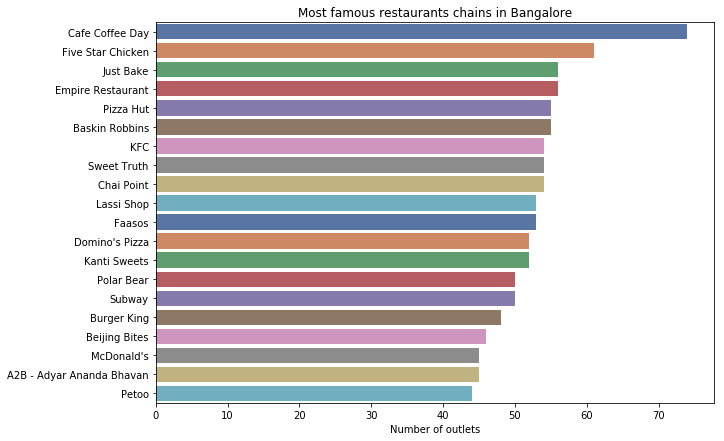

In [40]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")

Distribution of cost of meal for two people

In [41]:
# Transforming rate column
ogdf['rate_transformed'] = ogdf['rate'].astype(str)
ogdf['rate_transformed'] = ogdf['rate_transformed'].apply(lambda x: x.split('/')[0])

# Dealing with instanced with 'NEW'
ogdf['rate_transformed'] = ogdf['rate_transformed'].apply(lambda x: x.replace('NEW', str(np.nan)))
ogdf['rate_transformed'] = ogdf['rate_transformed'].apply(lambda x: x.replace('-', str(np.nan)))

# Changing data type
ogdf['rate_transformed'] = ogdf['rate_transformed'].astype(float)
#df.drop(['rate'], axis=1, inplace=True)
print(f'{type(ogdf["rate_transformed"][0])}')

<class 'numpy.float64'>


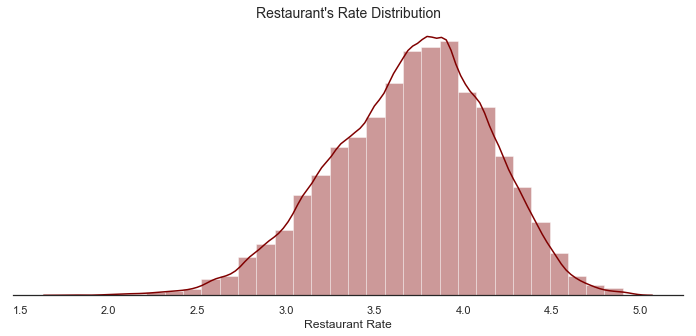

In [42]:
sns.set(style='white', palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(12, 5))
sns.despine(left=True)
sns.distplot(ogdf['rate_transformed'], bins=30, color='maroon')
ax.set_title("Restaurant's Rate Distribution", size=14)
ax.set_xlabel('Restaurant Rate')
plt.setp(ax, yticks=[])
plt.show()

In [43]:
#ogdf['approx_cost(for two people)'].describe()
print(f'{type(ogdf["approx_cost(for two people)"][0])}')

<class 'str'>


In [44]:
# Changing data type from approx_cost column
ogdf['approx_cost(for two people)'] = ogdf['approx_cost(for two people)'].astype(str)
ogdf['approx_cost(for two people)'] = ogdf['approx_cost(for two people)'].apply(lambda x: x.replace(',', '.'))
ogdf['approx_cost(for two people)'] = ogdf['approx_cost(for two people)'].astype(float)
print(f'{type(ogdf["approx_cost(for two people)"][0])}')

<class 'numpy.float64'>


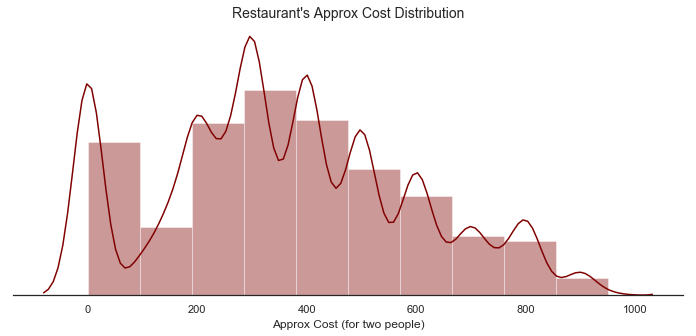

In [45]:
sns.set(style='white', palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(12, 5))
sns.despine(left=True)
sns.distplot(ogdf['approx_cost(for two people)'], bins=10, color='maroon')
ax.set_title("Restaurant's Approx Cost Distribution", size=14)
ax.set_xlabel('Approx Cost (for two people)')
plt.setp(ax, yticks=[])
plt.show()

Which are the most common restaurant type in Banglore?

Text(0.5, 0, 'count')

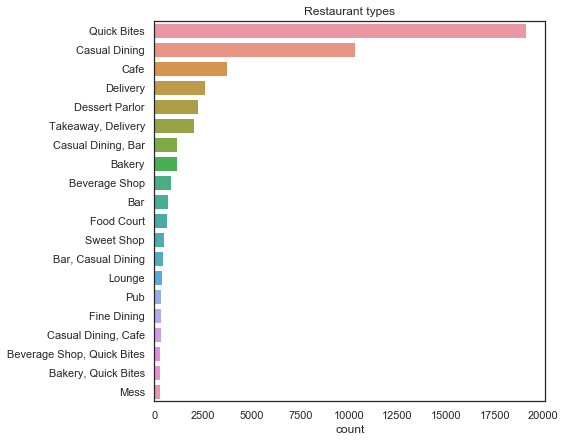

In [46]:
plt.figure(figsize=(7,7))
rest=ogdf['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

Which are the most popular cuisines of Bangalore?

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

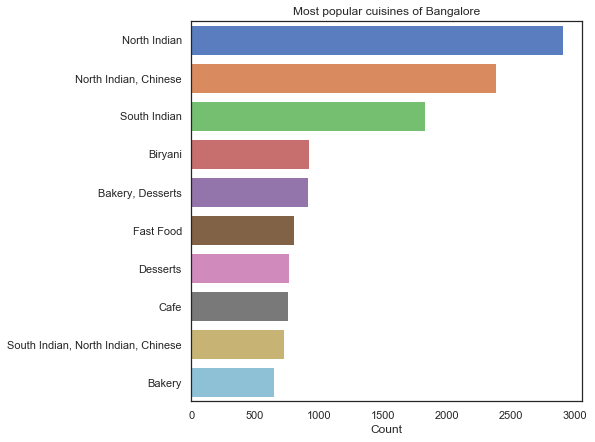

In [47]:
plt.figure(figsize=(7,7))
cuisines=ogdf['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [48]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['name','rate','votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

In [49]:
encoded_df_test = Encode(df.copy())

In [50]:
encoded_df_test.head()

,name,rate,votes,location,approx_cost,city,NorthIndian,NorthEastIndian,Chinese,SouthIndian,...,rest_type_Irani Cafee,rest_type_Kiosk,rest_type_Lounge,rest_type_Meat Shop,rest_type_Mess,rest_type_Microbrewery,rest_type_Pub,rest_type_Quick Bites,rest_type_Sweet Shop,rest_type_Takeaway
0,Jalsa,4.1,775,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,4.1,787,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,3.8,918,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,3.7,88,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,Grand Village,3.8,166,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
encoded_df_test=encoded_df_test.drop(['name'],axis=1)

In [52]:
target=encoded_df_test["approx_cost"]
target = target.astype(float)

In [53]:
#retrive the features excluding target variable
features = encoded_df_test[encoded_df_test.columns.drop('approx_cost')]

In [54]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [56]:
#implementing Linear Regression
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
y_pred_train = linear_regression.predict(X_train)


In [57]:
print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

Checking error/score on training Data
Mean Square Error: 46.48036806235528
R2 score: 0.35348165477377713


In [58]:
r2_linear_regression_train = r2_score(y_train, y_pred_train)
ms_linear_regression_train = mean_squared_error(y_train, y_pred_train)

In [59]:
print("Checking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

Checking error/score on test Data
Mean Square Error: 44.925893190453465
R2 score: 0.35402036687907246


In [60]:
r2_linear_regression_test = r2_score(y_test, y_pred)
ms_linear_regression_test = mean_squared_error(y_test, y_pred)

In [61]:
#cross validation of Linear regression
from sklearn.model_selection import cross_val_score
cross_validation_linear_regression = cross_val_score(linear_regression,X_train,y_train,cv=5)
print("Output from cross-validation: " +str(cross_validation_linear_regression.mean()))

Output from cross-validation: 0.35011998237055925


Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
y_pred = random_forest_model.predict(X_test)
y_pred_train = random_forest_model.predict(X_train)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

Checking error/score on training Data
Mean Square Error: 5.616549500553793
R2 score: 0.9218766451223492


In [65]:
r2_random_forest_train = r2_score(y_train, y_pred_train)
ms_random_forest_train = mean_squared_error(y_train, y_pred_train)

In [66]:
print("Checking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

Checking error/score on test Data
Mean Square Error: 18.566553262100584
R2 score: 0.7330355745243039


In [67]:
r2_random_forest_test = r2_score(y_test, y_pred)
ms_random_forest_test = mean_squared_error(y_test, y_pred)

In [68]:
#cross validation of Random forest
cross_validation_random_forest = cross_val_score(random_forest_model,X_train,y_train,cv=5)
print("Output from cross-validation:")
cross_validation_random_forest.mean()

Output from cross-validation:


0.6858635163768867

XG Boost Implementation

In [73]:
import xgboost as xgb

xb = xgb.XGBRegressor(silent=True)
xb.fit(X_train, y_train)
y_pred = xb.predict(X_test)
y_pred_train = xb.predict(X_train)

In [74]:
print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

Checking error/score on training Data
Mean Square Error: 41.372034230401596
R2 score: 0.4245359874646718


In [75]:
r2_xg_boost_train = r2_score(y_train, y_pred_train)
ms_xg_boost_train = mean_squared_error(y_train, y_pred_train)

In [76]:
print("Checking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

Checking error/score on test Data
Mean Square Error: 40.223068540294236
R2 score: 0.4216412582270369


In [77]:
r2_xg_boost_test = r2_score(y_test, y_pred)
ms_xg_boost_test = mean_squared_error(y_test, y_pred)

In [78]:
target = target.astype(float)
features = features.astype(float)

In [79]:
#cross validation of XG Boost
cross_validation_xg_boost = cross_val_score(xb,X_train,y_train,cv=5)
print("Output from cross-validation:")
cross_validation_xg_boost.mean()

Output from cross-validation:


0.41089460024074353

Plotting cross validation graph on built models

In [80]:
#plotting cross validation graphs
cvs  = (cross_validation_random_forest.mean(),cross_validation_xg_boost.mean())

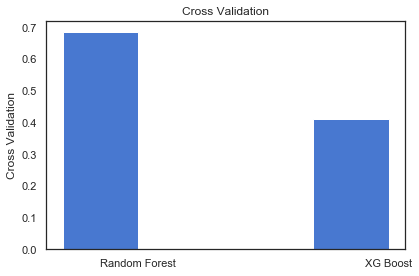

In [81]:
ind = np.arange(len(cvs)) 
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, cvs, width)

ax.set_ylabel('Cross Validation')
ax.set_title('Cross Validation')
ax.set_xticks(ind)
ax.set_xticklabels(('Random Forest', 'XG Boost'))

fig.tight_layout()

plt.show()

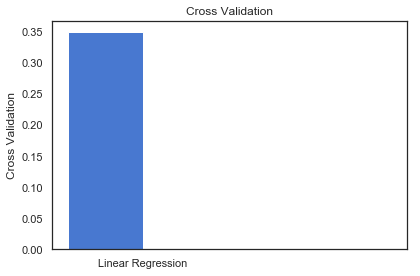

In [82]:
cvs  = (cross_validation_linear_regression.mean(),0)
ind = np.arange(len(cvs)) 
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, cvs, width)

ax.set_ylabel('Cross Validation')
ax.set_title('Cross Validation')
ax.set_xticks(ind)
ax.set_xticklabels(('Linear Regression',''))
fig.tight_layout()
plt.show()

Comparing train and test results

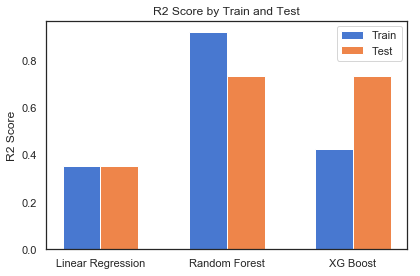

In [87]:
#plotting R2 Score of each of these models in terms of training and testing

train_data  = (r2_linear_regression_train, r2_random_forest_train, r2_xg_boost_train)
test_data = (r2_linear_regression_test, r2_random_forest_test, r2_random_forest_test)

ind = np.arange(len(train_data)) 


width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, train_data, width,label='Train')
rects2 = ax.bar(ind + width/2, test_data, width,label='Test')


ax.set_ylabel('R2 Score')
ax.set_title('R2 Score by Train and Test')
ax.set_xticks(ind)
ax.set_xticklabels(('Linear Regression', 'Random Forest', 'XG Boost'))
ax.legend()


fig.tight_layout()

plt.show()

Tuning the Model using grid search

In [88]:
#Model Tuning with GridSearch on Linear Regression

from sklearn.model_selection import GridSearchCV
linear_regression = linear_model.LinearRegression()

In [89]:
grid_parameters = {'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True, False]}
lr_model = GridSearchCV(estimator=linear_regression,param_grid=grid_parameters,cv=5,n_jobs=-1)
lr_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
y_pred = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

In [91]:
print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

Checking error/score on training Data
Mean Square Error: 46.48036806235529
R2 score: 0.353481654773777


In [92]:
r2_linear_regression_train = r2_score(y_train, y_pred_train)
ms_linear_regression_train = mean_squared_error(y_train, y_pred_train)

In [93]:
print("Checking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

Checking error/score on test Data
Mean Square Error: 44.925893190453465
R2 score: 0.35402036687907246


In [94]:
r2_linear_regression_test_after = r2_score(y_test, y_pred)
ms_linear_regression_test_after = mean_squared_error(y_test, y_pred)

Model Tuning with GridSearch on Random Forest

In [95]:
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestRegressor()

In [96]:
grid_parameters = {"min_samples_split":[3,6,9],"max_features":["auto","sqrt","log2"],"n_estimators":[8,16,24]}
rf_model = GridSearchCV(estimator=random_forest,param_grid=grid_parameters,cv=5,n_jobs=-1)
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 

In [97]:
rf_model.best_params_

{'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 24}

In [98]:
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [99]:
print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

Checking error/score on training Data
Mean Square Error: 5.383032593635202
R2 score: 0.925124746859427


In [100]:
r2_random_forest_train = r2_score(y_train, y_pred_train)
ms_random_forest_train = mean_squared_error(y_train, y_pred_train)

In [101]:
print("Checking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

Checking error/score on test Data
Mean Square Error: 17.03259359514136
R2 score: 0.7550920464720933


In [102]:
r2_random_forest_test_after = r2_score(y_test, y_pred)
ms_random_forest_test_after = mean_squared_error(y_test, y_pred)

In [103]:
#cross validation of Random forest
cross_validation_random_forest = cross_val_score(rf_model,X_train,y_train,cv=5)
print("Output from cross-validation:")
cross_validation_random_forest.mean()

Output from cross-validation:


0.7051798329397108

Mode Tuning with GridSearch on XGBoost

In [104]:
xb = xgb.XGBRegressor(silent=True)

In [105]:
grid_parameters = {"min_samples_split":[3,6,9],"max_features":["auto","sqrt","log2"],"n_estimators":[8,16,24]}
xb_model = GridSearchCV(estimator=xb,param_grid=grid_parameters,cv=5,n_jobs=-1)

In [106]:
xb_model.fit(X_train, y_train)
y_pred = xb_model.predict(X_test)
y_pred_train = xb_model.predict(X_train)

C:\Users\Jigar\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Jigar\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Jigar\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Jigar\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the execut

In [107]:
print("Checking error/score on training Data")
print("Mean Square Error: "+str(mean_squared_error(y_train, y_pred_train)))
print("R2 score: "+str(r2_score(y_train, y_pred_train)))

Checking error/score on training Data
Mean Square Error: 47.42462317456275
R2 score: 0.3403475450826321


In [108]:
r2_xg_boost_train = r2_score(y_train, y_pred_train)
ms_xg_boost_train = mean_squared_error(y_train, y_pred_train)

In [109]:
print("Checking error/score on test Data")
print("Mean Square Error: "+str(mean_squared_error(y_test, y_pred)))
print("R2 score: "+str(r2_score(y_test, y_pred)))

Checking error/score on test Data
Mean Square Error: 45.66272648664007
R2 score: 0.34342560139886047


In [110]:
r2_xg_boost_test_after = r2_score(y_test, y_pred)
ms_xg_boost_test_after = mean_squared_error(y_test, y_pred)

Plotting R2 Score showing changes in R2 Score before tuning and After tuning

In [111]:
before_tuning  = (r2_random_forest_test , r2_xg_boost_test)
after_tuning = (r2_random_forest_test_after , r2_xg_boost_test_after)

In [112]:
ind = np.arange(len(before_tuning)) 

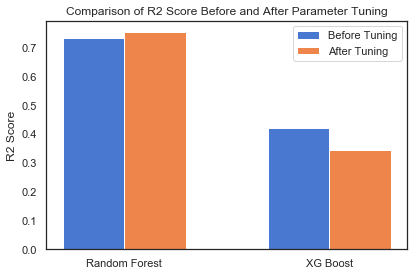

In [113]:
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, before_tuning, width,label='Before Tuning')
rects2 = ax.bar(ind + width/2, after_tuning, width,label='After Tuning')


ax.set_ylabel('R2 Score')
ax.set_title('Comparison of R2 Score Before and After Parameter Tuning')
ax.set_xticks(ind)
ax.set_xticklabels(('Random Forest', 'XG Boost'))
ax.legend()


fig.tight_layout()

plt.show()

Plotting Mean Square Error showing changes in Mean Square Error before tuning and After tuning

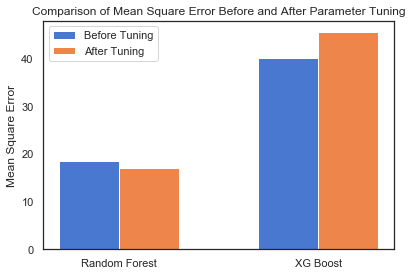

In [114]:
before_tuning  = (ms_random_forest_test , ms_xg_boost_test)
after_tuning = (ms_random_forest_test_after , ms_xg_boost_test_after)

ind = np.arange(len(before_tuning)) 

width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, before_tuning, width,label='Before Tuning')
rects2 = ax.bar(ind + width/2, after_tuning, width,label='After Tuning')

ax.set_ylabel('Mean Square Error')
ax.set_title('Comparison of Mean Square Error Before and After Parameter Tuning')
ax.set_xticks(ind)
ax.set_xticklabels(('Random Forest', 'XG Boost'))
ax.legend()

fig.tight_layout()

plt.show()